#### Objective Function
F(β)=log(1+exp(−yxβ) +λβ . 

#### Gradient Function
∇F(β) = (exp(yxbeta)/(1+exp(yxbeta)) * (yx) + 2*lambda*beta

#### Using the Spam dataset for building the L2-regularised Logistic Regression model

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from numpy import multiply
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
spam = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.data', sep=' ', header=None)
split = pd.read_csv("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.traintest", sep=" ", header=None)

X = spam.drop([57], axis = 1)
y = spam[57].copy()
#Change output labels
y[y==0] = -1
X.head()


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [9]:
#split the data
X_train = X[split[0] == 0]
X_test = X[split[0] == 1]
y_train = y[split[0] == 0]
y_test = y[split[0] == 1]
type(y_train)

pandas.core.series.Series

In [137]:
spam = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.data', sep=' ', header=None)
split = pd.read_csv("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.traintest", sep=" ", header=None)

X = spam.drop([57], axis = 1)
y = spam[57].copy()
#Change output labels
y[y==0] = -1

#split the data
X_train = X[split[0] == 0]
X_test = X[split[0] == 1]
y_train = y[split[0] == 0]
y_test = y[split[0] == 1]

#Normalize the data
mn = X_train.mean()
sd = X_train.std()
X_train = (X_train-mn)/sd
X_test = (X_test - mn)/sd

In [ ]:
"""
spam = pd.read_csv("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.data", sep = " ", header = None)
spam.head()
spam = spam.dropna()
spam[57].unique()

## Create the X matrix with 57 predictors and y vector with the classification spam or not
X = spam.drop([57],axis = 1)
X = pd.get_dummies(X, drop_first=True)
X = asdataframe(X)
y = spam[57]

## Converting the output from 0/1 to +1/-1
y = y.apply(lambda x: -1 if x is 0 else 1)
y.unique()

y = y.astype('int')
## Splitting the data into test and train split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

## Standardize the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler = preprocessing.StandardScaler().fit(y_train.values.reshape(-1,1))
y_train = scaler.transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test = scaler.transform(y_test.values.reshape(-1,1)).reshape(-1)
"""

In [ ]:
def obj(beta, L, X=X_train, y=y_train):
    XB = X.dot(beta)
    yXB = multiply(y, XB)
    return ((1/n*sum(np.log(1+np.exp(-1*yXB))))+ L*(np.linalg.norm(beta)**2))

In [140]:
def computegrad(beta, L, X=X_train, y=y_train):
    ## Making Q matrix
    n = X.shape[0]
    XB = X.dot(beta)
    yXB = multiply(y, XB)
    p = 1/(1+np.exp(-1*yXB))
    Q = np.diag(1-p) ## n x n 
    ## X: n x d  y: n x 1
    return (-1/n * X.T.dot(Q.dot(y))) + 2*L*beta


#### Implementing the backtracking algorithm

In [141]:
def backtracking(beta, t_init, L, alpha=0.5, gamma=0.5, X=X_train, y=y_train):
    t = t_init
    grad_beta = computegrad(beta,L)
    obj_b = obj(beta,L)
    while obj(beta-t*grad_beta,L) > (obj_b - alpha*t*(np.linalg.norm(grad_beta)**2)):
        t = t*gamma
    return t

### Writing gradient descent algorithm

In [142]:
def graddescent(beta_init,t_init, L, alpha=0.5, gamma=0.8, eps=0.005, X=X_train, y=y_train):
    beta = beta_init
    beta_vals = [beta]
    grad_beta = computegrad(beta,L)
    t = t_init
    while np.linalg.norm(grad_beta) > eps:
        beta = beta - t*grad_beta
        beta_vals.append(beta)
        t = backtracking(beta,t,L,alpha, gamma,X,y)
        grad_beta = computegrad(beta,L)
    return (np.array(beta_vals),beta)

#### Implementing fast gradient algorithm.

In [143]:
def fastgradalgo(X, y, b_init, eta_init, l2_const, eps, alpha, gamma):
    b = b_init.copy()
    theta = np.zeros(b_init.shape[0])
    b_vals = [b]
    t = 0
    grad_b = computegrad(b, l2_const)
    grad_theta = computegrad(theta, l2_const)
    eta = eta_init
    while np.linalg.norm(grad_b) > eps:
        b_prev = b
        b = theta - eta*grad_theta
        theta = b + t/(t+3) *(b-b_prev)
        b_vals.append(b)
        eta = backtracking(b, eta, l2_const, alpha, gamma)
        grad_b = computegrad(b, l2_const)
        grad_theta = computegrad(theta, l2_const)
        t+=1
    return np.array(b_vals)

In [144]:
def convergence_plots(X, y, b_vals, l2_const):
    """
    Plot the convergence in terms of the function values and the gradients
    Input:
      - x_vals: Values the gradient descent algorithm stepped to
    """
    n, d = b_vals.shape
    fs = np.zeros(n)
    grads = np.zeros((n, d))
    for i in range(n):
        fs[i] = obj(X, y, b_vals[i], l2_const)
        grads[i, :] = computegrad(X, y, b_vals[i], l2_const)
    grad_norms = np.linalg.norm(grads, axis=1)
    
    plt.plot(fs)
    plt.xlabel = 'Iteration'
    plt.ylabel = 'Objective value'
    plt.suptitle = 'Objective Function Value and Norm'
    plt.show()

    #plt.subplot(122)
    plt.plot(grad_norms)
    plt.xlabel = 'Iteration'
    plt.ylabel = 'Norm of gradient'
    plt.suptitle = 'Norm of Gradient Convergence'
    plt.show()

In [145]:
def predict_label(X, beta):
    z = X.dot(beta)
    return np.sign(z)

In [146]:
def get_t_init(X, L):
    n, d = X.shape
    eigenvals = np.linalg.eigh((1/n)*X.T.dot(X))[0]
    l_est = max(eigenvals)+L
    return 1/l_est

### Training the model with eps = 0.005

In [147]:
eps = 0.005
L = 0.5
n,d = X_train.shape
beta_init = np.zeros(d)
alpha = 0.5
gamma = 0.8
t_init = get_t_init(X_train,L)
print ("Initial step size", t_init)

print ("\n Beta Values from Gradient Descent Algorithm with Backtracking")
beta_vals, beta = graddescent(beta_init, t_init,L)
print("No of iterations",beta_vals.shape)
print("Latest value of beta", beta)

Initial step size 0.1370072526167436

 Beta Values from Gradient Descent Algorithm with Backtracking
No of iterations (21, 57)
Latest value of beta 0     0.021511
1    -0.014609
2     0.054314
3     0.019565
4     0.066845
5     0.065039
6     0.104801
7     0.059835
8     0.055336
9     0.032760
10    0.059949
11   -0.007555
12    0.027300
13    0.015303
14    0.049295
15    0.103817
16    0.073018
17    0.057569
18    0.070534
19    0.053118
20    0.108988
21    0.036292
22    0.094962
23    0.066735
24   -0.064062
25   -0.053121
26   -0.051620
27   -0.035168
28   -0.026522
29   -0.034351
30   -0.020362
31   -0.014655
32   -0.032248
33   -0.014745
34   -0.024852
35   -0.020775
36   -0.043638
37   -0.011420
38   -0.035913
39    0.000594
40   -0.024892
41   -0.037602
42   -0.032546
43   -0.027774
44   -0.043257
45   -0.045448
46   -0.013679
47   -0.025416
48   -0.018500
49   -0.020041
50   -0.015795
51    0.062451
52    0.094341
53    0.021108
54    0.028623
55    0.049669
56    0.0633

In [148]:
n

3065

In [149]:
print ("\n Beta Values from Fast Gradient Algorithm")

b_vals_fast = fastgradalgo(X_train, y_train, beta_init, t_init, L, eps, alpha, gamma)

print("Number of iterations:", b_vals_fast.shape[0])
print(b_vals_fast[-1])
print("No of iterations",b_vals_fast.shape)
print("Latest value of beta", b_vals_fast[-1])

pred = predict_label(X_train,b_vals_fast2[-1])
pred.shape

accuracy_score(y_train,pred)


 Beta Values from Fast Gradient Algorithm
Number of iterations: 15
[ 0.02037437 -0.01504766  0.05382601  0.0201659   0.06767104  0.06513334
  0.10719113  0.06070464  0.05483936  0.03239862  0.0590675  -0.00884775
  0.02647213  0.01510568  0.04888606  0.10616407  0.07335593  0.05778392
  0.07010499  0.05318147  0.10934256  0.03777327  0.09619363  0.06771813
 -0.0644759  -0.05277971 -0.05200922 -0.03478147 -0.02606825 -0.03419884
 -0.01969516 -0.01385046 -0.03250596 -0.01395656 -0.02450324 -0.01965913
 -0.04307649 -0.01184066 -0.03602103  0.00147358 -0.02456192 -0.03799271
 -0.03227758 -0.02820368 -0.04416688 -0.04605191 -0.01385177 -0.02572586
 -0.01925052 -0.02035322 -0.01555762  0.06338699  0.09617098  0.0214984
  0.02862236  0.04983215  0.063727  ]
No of iterations (15, 57)
Latest value of beta [ 0.02037437 -0.01504766  0.05382601  0.0201659   0.06767104  0.06513334
  0.10719113  0.06070464  0.05483936  0.03239862  0.0590675  -0.00884775
  0.02647213  0.01510568  0.04888606  0.10616

(3065,)

0.9249592169657422

In [150]:
## Defining the objective function vs iteration count function:
def obj_iter_plot(beta_vals,L, dlabel):
    n,d = beta_vals.shape
    ## Initialise an array to store obj function's value for each of the beta values:
    fs = np.zeros(n)
    for i in range(n):
        fs[i] = obj(beta_vals[i],L)
    plt.plot(fs,label = dlabel)
    plt.xlabel("IterationCount")
    plt.ylabel("Obj_function_at_beta")

<Figure size 504x432 with 0 Axes>

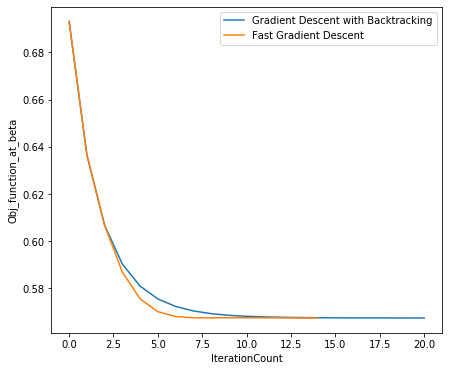

In [151]:
## Plotting the graph of F(beta) vs iteration count
plt.figure(figsize=(7, 6))
obj_iter_plot(beta_vals, L, "Gradient Descent with Backtracking")
obj_iter_plot(b_vals_fast, L, "Fast Gradient Descent")
plt.legend()
plt.show()

Thus we see from the above graph that fast gradient algorithm converges faster than the gradient descent algorithm. The no of iterations also vary considerably ( 14 in fast gradient and 21 in gradient descent with back tracking)

#### In order to check the performace of my model, have compared the results from scikit-learn Logistic Regression Model

In [152]:
## From sklearn's logistic regression documentation, we see C = 1/2nLambda
from sklearn.linear_model import LogisticRegression

L = 0.5
n,d = X_train.shape
Cprime = 1/(2*n*L) 
print (Cprime)
y_train = y_train.astype('int')

lr = LogisticRegression(C = 1/(2*n*L), fit_intercept = False)
fit = lr.fit(X_train, y_train)
beta_star = fit.coef_
#beta_star


#print("Beta t from fast grad algo", b_vals_fast[-1])
#print("Beta start from sklearn", beta_star[-1])
print("\nObjective Function value from fast grad algo", obj(b_vals_fast[-1],L))
print("Objective Function value from sklearn", obj(beta_star[-1],L))



0.0003262642740619902

Objective Function value from fast grad algo 0.5674985162746817
Objective Function value from sklearn 0.5674931480622794


From the above calculations, we observe that the objective function's value is very similar from both approach. 


In [153]:
def misclassification_error(X, y, beta):
    predicted = predict_label(X, beta)
    return 1-accuracy_score(y, predicted)
    

In [154]:
def error_plot(X, y, b_vals, dlabel):
    n = b_vals.shape[0]
    errors = np.zeros(n)
    for i in range(0,n):
        errors[i] = misclassification_error(X, y, b_vals[i])
    plt.plot(errors, label = dlabel)

In [155]:
type(X_train)

pandas.core.frame.DataFrame

In [156]:
## Getting Optimal Lambda
from sklearn.linear_model import LogisticRegressionCV

l2_const_grid = np.array([0.5*(2**i) for i in range(-10,6)])
Cs_opts = 1/(2*n*l2_const_grid)
#print(Cs_opts)
lrcv = LogisticRegressionCV(Cs = Cs_opts, fit_intercept = False, cv = 10, max_iter=10000)
fit = lrcv.fit(X_train, y_train)

print("Optimal C = ", lrcv.C_[0])
print("Optimal lambda = ", 1/(2*n*lrcv.C_[0]))
opt_lambda = 1/(2*n*lrcv.C_[0])

Optimal C =  0.010440456769983687
Optimal lambda =  0.015625


In [157]:
eps = 0.005
opt_L = opt_lambda
n,d = X_train.shape
beta_init = np.zeros(d)
alpha = 0.5
gamma = 0.8
t_init = get_t_init(X_train,opt_L)
print ("Initial step size", t_init)
y_train = y_train.astype('int')

print ("\n Beta Values from Gradient Descent Algorithm with Backtracking")
beta_vals2, beta2 = graddescent(beta_init, t_init, opt_L)
print("No of iterations",beta_vals2.shape)
#print("Latest value of beta", beta2)
print (accuracy_score(y_train, predict_label(X_train,beta_vals2[-1])))

print ("\n Beta Values from Fast Gradient Algorithm")
b_vals_fast2 = fastgradalgo(X_train, y_train, beta_init, t_init, opt_L, eps, alpha, gamma)
print("Number of iterations:", b_vals_fast2.shape)
#print("Latest value of beta", b_vals_fast2[-1])

Initial step size 0.14674572256583954

 Beta Values from Gradient Descent Algorithm with Backtracking
No of iterations (248, 57)
0.9161500815660685

 Beta Values from Fast Gradient Algorithm
Number of iterations: (57, 57)


In [158]:
print ("\n Objective Function Value ")
print("Obj Value from Gradient Descent with Backtracking", obj(beta_vals2[-1],opt_L))
print("Obj Value from Fast Grade Algo", obj(b_vals_fast2[-1],opt_L))


 Objective Function Value 
Obj Value from Gradient Descent with Backtracking 0.32056371231748315
Obj Value from Fast Grade Algo 0.32050072800264406


1       1
3       1
4       1
5       1
6       1
       ..
4596   -1
4597   -1
4598   -1
4599   -1
4600   -1
Name: 57, Length: 3065, dtype: int64

<Figure size 504x432 with 0 Axes>

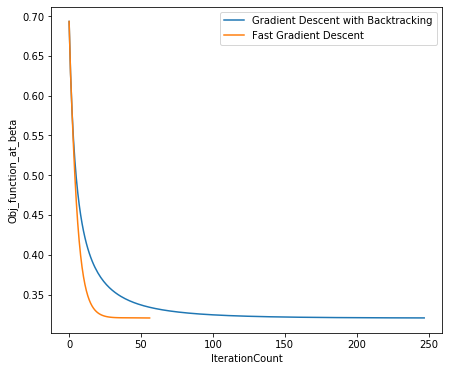

In [159]:
y_train
plt.figure(figsize=(7, 6))
obj_iter_plot(beta_vals2, opt_L, "Gradient Descent with Backtracking")
obj_iter_plot(b_vals_fast2, opt_L, "Fast Gradient Descent")
plt.legend()
plt.show()

From the above calculations, we see that 
- a) Optimal Lambda is very very small than what we started with earlier (. 0.015<< 0.5) 
- b) No. of iteration increase considerable for gradient descent with backtracking although the no of iterations for fast gradient as same 
- c) The value of objective function with gradient descent with optimal lambda is similar to that from fast gradient algorithm (0.25 << 0.51)

Parameters:
t_init = 0.14674572256583954
lambda =  0.015625
Number of iterations:  248


<Figure size 576x504 with 0 Axes>

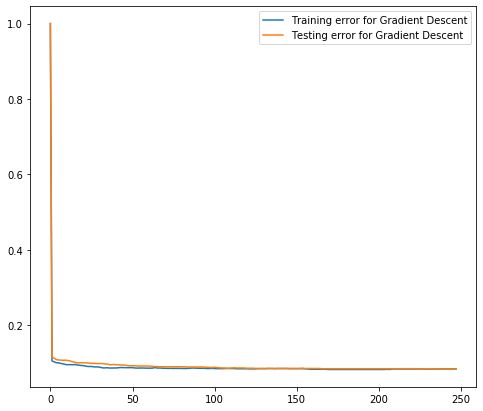

In [160]:
print("Parameters:")
print("t_init =", t_init)
print("lambda = ", opt_L)
print("Number of iterations: ", beta_vals2.shape[0])
y_test = y_test.astype('int')
plt.figure(figsize=(8, 7))
error_plot(X_train, y_train, beta_vals2, "Training error for Gradient Descent")
error_plot(X_test, y_test, beta_vals2, "Testing error for Gradient Descent")
plt.legend()
plt.show()

Parameters:
eta_init = 0.14674572256583954
lambda =  0.015625
Number of iterations:  57


<Figure size 576x504 with 0 Axes>

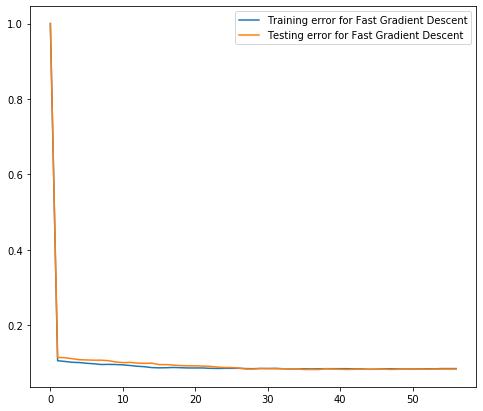

In [161]:
print("Parameters:")
print("eta_init =", t_init)
print("lambda = ", opt_L)
print("Number of iterations: ", b_vals_fast2.shape[0])
plt.figure(figsize=(8,7))
error_plot(X_train, y_train, b_vals_fast2, "Training error for Fast Gradient Descent")
error_plot(X_test, y_test, b_vals_fast2, "Testing error for Fast Gradient Descent")
plt.legend()
plt.show()

<Figure size 576x504 with 0 Axes>

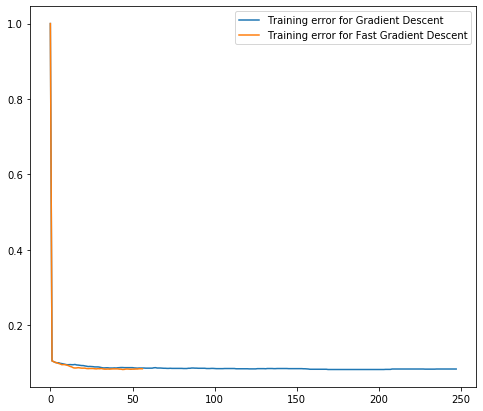

In [162]:
plt.figure(figsize=(8,7))
error_plot(X_train, y_train, beta_vals2, "Training error for Gradient Descent")
error_plot(X_train, y_train, b_vals_fast2, "Training error for Fast Gradient Descent")
plt.legend()
plt.show()

<Figure size 576x504 with 0 Axes>

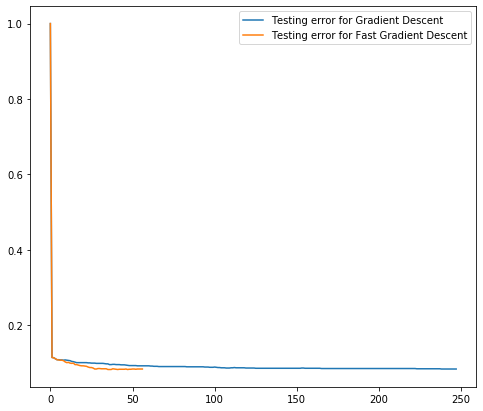

In [163]:
plt.figure(figsize=(8,7))
error_plot(X_test, y_test, beta_vals2, "Testing error for Gradient Descent")
error_plot(X_test, y_test, b_vals_fast2, "Testing error for Fast Gradient Descent")
plt.legend()
plt.show()

From the above plots of misclassification error, we see that due to optimal Lmabda (0.0005), the classification error has highly increased. This makes sense that keeping a very small Lambda, in turns negates the effect of penalty. Due to this, though the objective value is very low with the optimal lambda but the classification error has highly increased.

### Excercise 2

Suppose we estimate the regression coefficients in a logistic regression model by minimizing
F(β):= log􏰃1+exp(−yixTi β)􏰄 +λ∥β∥2
for a particular value of λ. For parts (a) through (e), indicate which of (i) through (v) is correct. Justify your answer.



With the increase in Lambda, one should see a steady increase in

#### Q 2.2 (b) Repeat (a) for the misclassification error on a large dataset of unseen data draw from the same probability distribution as the training set.

In [164]:
print (X_train.shape)
print(L_grid)

(3065, 57)
[0.     0.0075 0.015  0.0225 0.03   0.0375 0.045  0.0525 0.06   0.0675
 0.075  0.0825 0.09   0.0975 0.105  0.1125 0.12   0.1275 0.135  0.1425
 0.15   0.1575 0.165  0.1725 0.18   0.1875 0.195  0.2025 0.21   0.2175
 0.225  0.2325 0.24   0.2475 0.255  0.2625 0.27   0.2775 0.285  0.2925]


In [165]:
beta_init = np.zeros(d)
alpha = 0.5
gamma = 0.8
eps = 0.0051

L_grid = np.arange(0.0, 0.3, 0.0075)
train_error = np.zeros(L_grid.shape[0])
test_error = np.zeros(L_grid.shape[0])

for i in range(L_grid.shape[0]):
    t_init = get_t_init(X_train, L_grid[i])
    beta = fastgradalgo(X_train, y_train, beta_init, t_init, L_grid[i], eps, alpha, gamma)[-1]
    train_error[i] = misclassification_error(X_train, y_train, beta)
    test_error[i] = misclassification_error(X_test, y_test, beta)

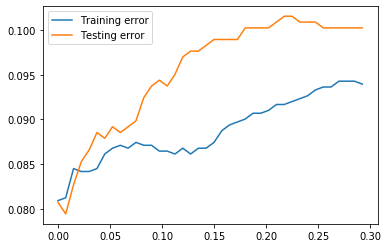

In [166]:
plt.plot(L_grid, train_error, label = "Training error")
plt.plot(L_grid, test_error, label = "Testing error")
plt.legend()